In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

In [11]:
# Define the paths to your training and validation data
train_data_dir = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train'
test_data_dir = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test'

# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create an ImageDataGenerator for test data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [12]:
# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the initial 5 layers
for layer in base_model.layers[:5]:
    layer.trainable = False

# Create a new model on top
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Train the model
history= model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

model.save('Resnet50_Alzheimers.h5')

Epoch 1/10
128/128 [==============================] - 95s 529ms/step - loss: 1.5444 - accuracy: 0.5248 - val_loss: 2.1223 - val_accuracy: 0.5081
Epoch 2/10
128/128 [==============================] - 73s 566ms/step - loss: 0.8813 - accuracy: 0.6303 - val_loss: 1.5805 - val_accuracy: 0.4970
Epoch 3/10
128/128 [==============================] - 66s 516ms/step - loss: 0.6975 - accuracy: 0.6995 - val_loss: 1.0571 - val_accuracy: 0.5020
Epoch 4/10
128/128 [==============================] - 68s 528ms/step - loss: 0.6325 - accuracy: 0.7787 - val_loss: 1.7359 - val_accuracy: 0.5020
Epoch 5/10
128/128 [==============================] - 68s 529ms/step - loss: 0.4199 - accuracy: 0.8379 - val_loss: 1.0641 - val_accuracy: 0.4970
Epoch 6/10
128/128 [==============================] - 64s 500ms/step - loss: 0.4756 - accuracy: 0.8711 - val_loss: 3.0566 - val_accuracy: 0.5000
Epoch 7/10
128/128 [==============================] - 64s 497ms/step - loss: 0.3198 - accuracy: 0.8923 - val_loss: 58489.1328 - va

In [14]:
test_accuracy=model.evaluate(test_generator)
print(test_accuracy[1])


40/40 [==============================] - 4s 102ms/step - loss: 412364.2500 - accuracy: 0.5004
0.5003909468650818


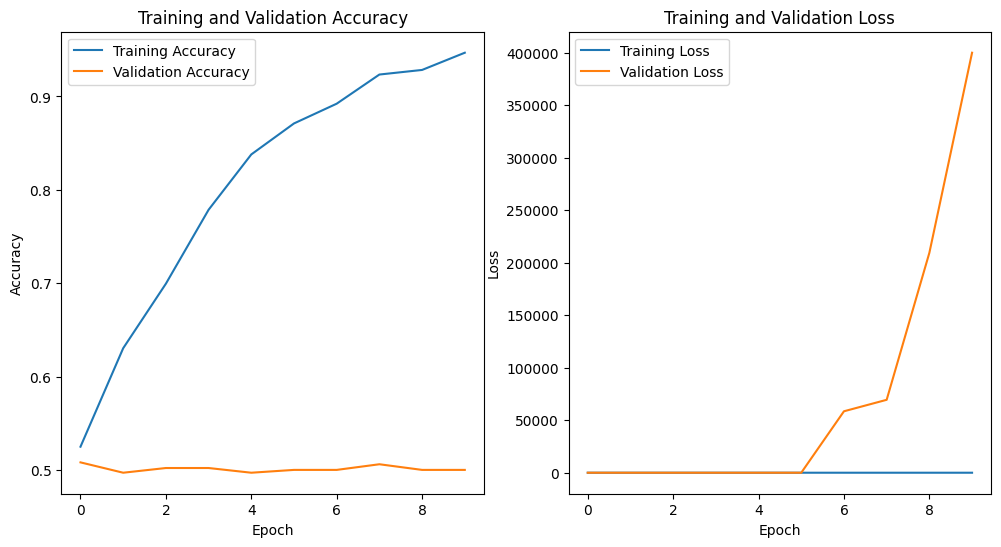

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()